## Лабораторная работа № 1

**Центральная предельная теорема** утверждает, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

Оцените распределение выборочного среднего случайной величины при разных объёмах выборок. Для этоговыполните следующие шаги.

**Решение должно содержать краткие пояснения каждого блока кода. И не забудьте подписывать оси графиков.**

1. Выберите любое распределение из тех, что не были описаны в курсе: [непрерывные (https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-distributions-in-scipy-stats), [дискретные](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-distributions-in-scipy-stats). Сгенерируйте из него выборку, постройте гистограмму и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Populating the interactive namespace from numpy and matplotlib


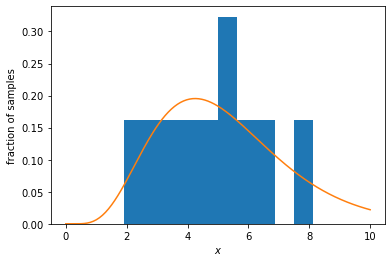

In [1]:
%pylab inline
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

g_rv = sts.gamma(5, 0.25)
sample = g_rv.rvs(10)

x = np.linspace(0, 10, 200)
pdf = g_rv.pdf(x)

plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

plt.plot(x, pdf, label='Theoretical PDF')

2. При пяти значениях n (например, 5, 10, 25, 50 и 100) сгенерируйте k (например, 1000) выборок объёма n и постройте гистограммы распределений их выборочных средних. 

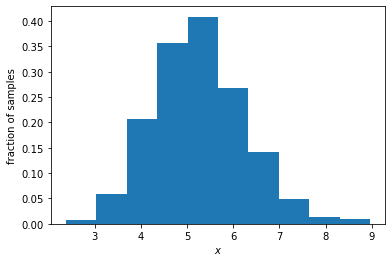

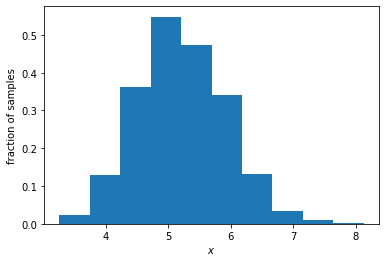

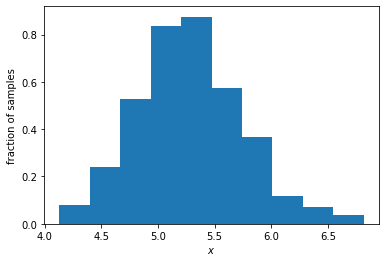

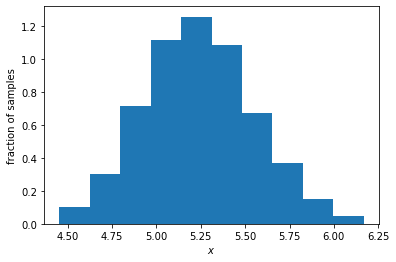

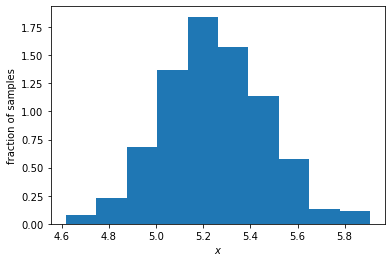

In [2]:
#rv = sts.gamma()

def gen_pdf(n): 
    means = []
    for _ in range(1000):
        sample = g_rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    plt.hist(means, density = True)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.show()
    
for n in [5, 10, 25, 50, 100]:
    gen_pdf(n)

3. Используя информацию о среднем и дисперсии исходного распределения (её можно найти на [Википедии](https://ru.wikipedia.org)), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

In [3]:
def find_params(n):

    EX = sts.gamma(5, 0.25).mean()
    std = sts.gamma(5, 0.25).std()
    DX = std**2

    return EX, DX/n #return mu, sigma

4. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

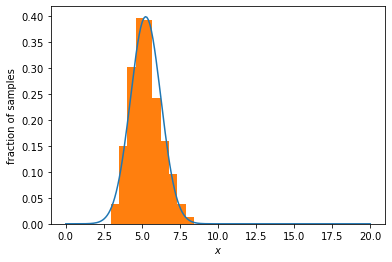

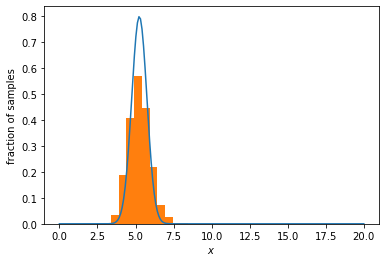

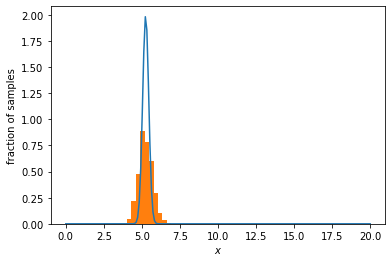

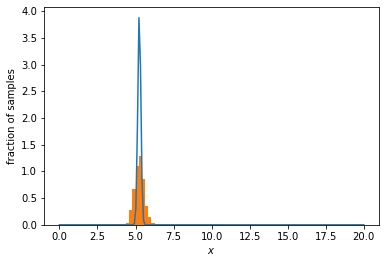

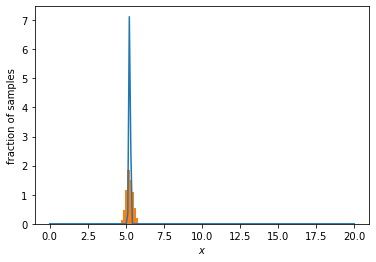

In [4]:
def new_gen_pdf(n, Ex, Dx):
    
    means = []
    for _ in range(1000):
        sample = g_rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    mu, sigma = find_params(n)
    norm_rv = sts.norm(mu, sigma)
    
    x = np.linspace(0,20,200)
    pdf = norm_rv.pdf(x)
    
    plt.plot(x, pdf, label='Theoretical PDF')
    plt.hist(means, density = True)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.show() 
    
    

for n in [5, 10, 25, 50, 100]:
    
    EX = sts.gamma(5, 0.25).mean()
    std = sts.gamma(5, 0.25).std()
    DX = std**2

    new_gen_pdf(n, EX, DX)
    plt.show()